In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.size"] = 15
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [4]:
result = pd.read_csv("../hyperparameters/Fine-tune.csv")

In [5]:
result

,Task,Vector size,wandb_id,Folder,sweep_id,wl_step,min_count,sample,Window size,alpha,Train MSE,Train R2,Test MSE,Test R2
0,Density,128,nc8snk1o,run-20230322_213119-lveejtnm,87,2,4,1,100,0.018500,0.055446,0.8665,0.138974,0.6819
1,Density,128,nc8snk1o,run-20230323_104254-l71pzrps,541,2,4,1,10,0.015800,0.054409,0.8690,0.139032,0.6818
2,Density,128,nc8snk1o,run-20230323_074522-h3xfyo92,421,2,4,1,10,0.016400,0.053207,0.8719,0.139896,0.6798
3,Density,128,nc8snk1o,run-20230323_111054-z2ffk3n1,554,2,4,1,10,0.015100,0.055194,0.8671,0.139910,0.6798
4,Density,128,nc8snk1o,run-20230323_074208-c153y1dp,416,2,0,1,10,0.018000,0.053989,0.8700,0.140891,0.6775
5,Density,256,navjxwp8,run-20230323_164256-02fps363,385,2,4,1,10,0.018300,0.047195,0.8864,0.128301,0.7063
6,Density,256,navjxwp8,run-20230323_213558-fpk023as,468,2,4,1,10,0.018500,0.047657,0.8853,0.130059,0.7023
7,Density,256,navjxwp8,run-20230324_092539-x3ftd9k4,638,2,4,1,10,0.017900,0.047961,0.8845,0.133953,0.6934
8,Density,256,navjxwp8,run-20230323_132156-yt68fbco,329,2,2,1,10,0.015500,0.048668,0.8828,0.135145,0.6907
9,Density,256,navjxwp8,run-20230323_210404-cb2bs0ql,459,2,2,1,10,0.014500,0.049693,0.8804,0.135190,0.6906


In [6]:
result[result["Task"]=="Density"]["Train MSE"]

0     0.055446
1     0.054409
2     0.053207
3     0.055194
4     0.053989
5     0.047195
6     0.047657
7     0.047961
8     0.048668
9     0.049693
10    0.043906
11    0.042786
12    0.045343
13    0.045286
14    0.044977
15    0.040849
16    0.039396
17    0.040627
18    0.042044
19    0.041475
20    0.039040
21    0.039019
22    0.038364
23    0.037596
24    0.039305
Name: Train MSE, dtype: float64

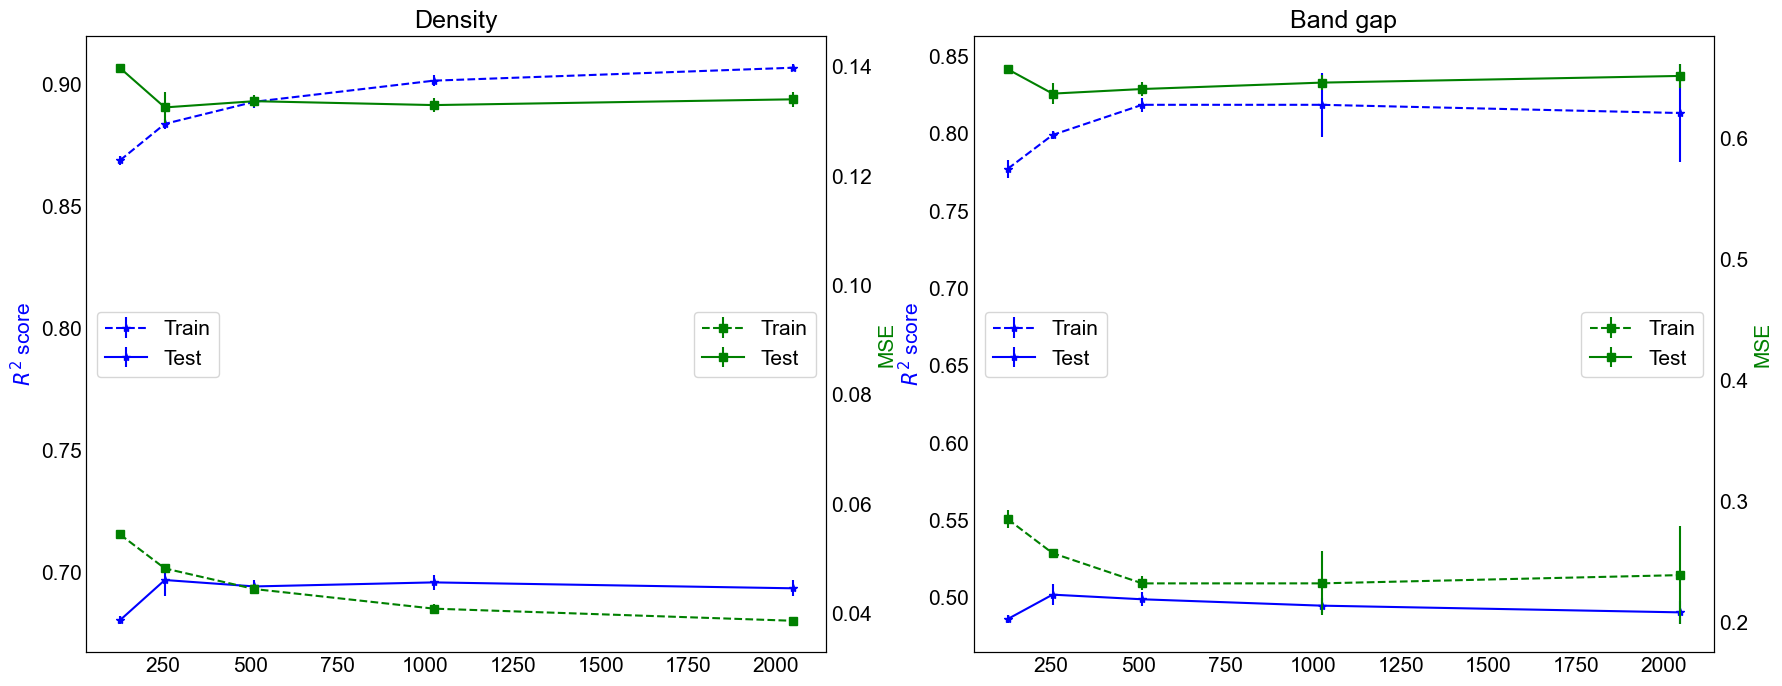

In [62]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(21, 8)

axs[0].title.set_text("Density")
axs[0].errorbar(
    np.unique(result[result["Task"]=="Density"]["Vector size"]), 
    np.array(result[result["Task"]=="Density"]["Train R2"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Density"]["Train R2"]).reshape(5,-1).std(1),
    label="Train",
    fmt="b*--"
)

axs[0].errorbar(
    np.unique(result[result["Task"]=="Density"]["Vector size"]), 
    np.array(result[result["Task"]=="Density"]["Test R2"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Density"]["Test R2"]).reshape(5,-1).std(1),
    label="Test",
    fmt="b*-"
)
axs[0].set_ylabel("$R^2$ score", color="b")
axs[0].legend(loc='center left')

ax0_1 = axs[0].twinx()
ax0_1.errorbar(
    np.unique(result[result["Task"]=="Density"]["Vector size"]), 
    np.array(result[result["Task"]=="Density"]["Train MSE"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Density"]["Train MSE"]).reshape(5,-1).std(1),
    label="Train",
    fmt="gs--"
)

ax0_1.errorbar(
    np.unique(result[result["Task"]=="Density"]["Vector size"]), 
    np.array(result[result["Task"]=="Density"]["Test MSE"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Density"]["Test MSE"]).reshape(5,-1).std(1),
    label="Test",
    fmt="gs-"
)
ax0_1.set_ylabel("MSE", color="g")
ax0_1.legend(loc='center right')

axs[1].title.set_text("Band gap")
axs[1].errorbar(
    np.unique(result[result["Task"]=="Band gap"]["Vector size"]), 
    np.array(result[result["Task"]=="Band gap"]["Train R2"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Band gap"]["Train R2"]).reshape(5,-1).std(1),
    label="Train",
    fmt="b*--"
)

axs[1].errorbar(
    np.unique(result[result["Task"]=="Band gap"]["Vector size"]), 
    np.array(result[result["Task"]=="Band gap"]["Test R2"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Band gap"]["Test R2"]).reshape(5,-1).std(1),
    label="Test",
    fmt="b*-"
)
axs[1].set_ylabel("$R^2$ score", color="b")
axs[1].legend(loc='center left')

ax1_1 = axs[1].twinx()
ax1_1.errorbar(
    np.unique(result[result["Task"]=="Band gap"]["Vector size"]), 
    np.array(result[result["Task"]=="Band gap"]["Train MSE"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Band gap"]["Train MSE"]).reshape(5,-1).std(1),
    label="Train",
    fmt="gs--"
)

ax1_1.errorbar(
    np.unique(result[result["Task"]=="Band gap"]["Vector size"]), 
    np.array(result[result["Task"]=="Band gap"]["Test MSE"]).reshape(5,-1).mean(1),
    np.array(result[result["Task"]=="Band gap"]["Test MSE"]).reshape(5,-1).std(1),
    label="Test",
    fmt="gs-"
)
ax1_1.set_ylabel("MSE", color="g")
ax1_1.legend(loc='center right')
